# Gym Duckietown 🦆

Gym-Duckietown is a simulator for the Duckietown Universe, written in pure Python/OpenGL (Pyglet). It places your agent, a Duckiebot, inside of an instance of a Duckietown: a loop of roads with turns, intersections, obstacles, Duckie pedestrians, and other Duckiebots. It can be a pretty hectic place!

Have a look at the GitHub repo for more details: https://github.com/duckietown/gym-duckietown

There are several maps and tracks available which can be accessed through registered gym environments, each corresponding to a different map file:

- Duckietown-straight_road-v0
- Duckietown-4way-v0
- Duckietown-udem1-v0
- Duckietown-small_loop-v0
- Duckietown-small_loop_cw-v0
- Duckietown-zigzag_dists-v0
- Duckietown-loop_empty-v0
- Duckietown-loop_obstacles-v0 (static obstacles in the road)
- Duckietown-loop_pedestrians-v0 (moving obstacles in the road)

We will work with the following for our challenges:

- Getting Started: Duckietown-small_loop-v0
- Basic: Duckietown-small_loop-v0
- Medium: Duckietown-loop_empty-v0
- Advanced: Duckietown-loop_obstacles-v0 (static obstacles in the road)

- Bonus: Duckietown-zigzag_dists-v0, Duckietown-loop_pedestrians-v0 (moving obstacles in the road)

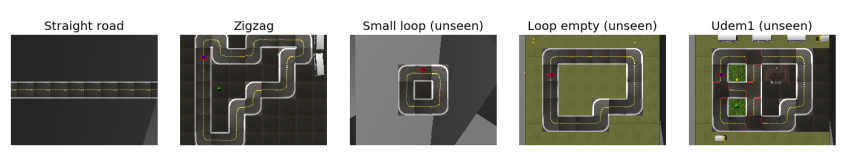


Below is the standard control loop with the small loop environment loaded:

## Now try loading different environments:

## Reload the small loop track and complete the following:

- Drive Straight
- Turn Left
- Turn Right

_Hint: Investigate the action space and try different values to the action (you can print the random action to understand the format)_

In [1]:

# BASIC CHALLENGES GO STRAIGHT, GO LEFT, GO RIGHT, DISPLAY OBSERVATION 

from pprint import pprint 

# GLOBAL SPEED OF OBJECT
SPEED = 0.5



def drive_straight(speed:float= SPEED)->[float,float]:
    # velocity angle
    return [speed, 0.0]

def drive_left(speed:float=SPEED)->[float,float]:

    return [speed,0.5]

def drive_right(speed:float=SPEED)->[float,float]:
    return [speed,-0.5]

def show_observation(obn):
    print('SINGLE OBSERVATION')
    pprint(obn)

def display_all_observations(obs):
    for obn in obs:
        position, velocity,angle, *rest_vars = obn

        print(f'''
    position: {position}
    velocity: {velocity}
    angle: {angle}
    ''')

def make_90_degree_turn(speed:float = SPEED, direction_left:bool = True) -> [float,float]:
    
    angle = 1.0 if direction_left else -1.0
    return [0.02, angle]
    

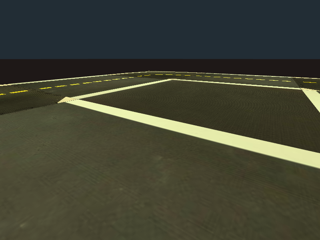

INFO:gym-duckietown:using user tile start: (0, 0)
DEBUG:gym-duckietown:tile: {'coords': (0, 0), 'kind': 'curve_left', 'angle': 3, 'drivable': True, 'curves': array([[[0.585 , 0.    , 0.1755],
        [0.2925, 0.    , 0.1755],
        [0.1755, 0.    , 0.2925],
        [0.1755, 0.    , 0.585 ]],

       [[0.4095, 0.    , 0.585 ],
        [0.4095, 0.    , 0.468 ],
        [0.468 , 0.    , 0.4095],
        [0.585 , 0.    , 0.4095]]]), 'texture': <gym_duckietown.graphics.Texture object at 0x7f0093f49c40>, 'color': array([0.91438497, 0.94902252, 0.94967423, 1.        ])}
INFO:gym-duckietown:using map pose start: ([0.2, 0, 0.2], 0)
INFO:gym-duckietown:Using map pose start. 
 Pose: [0.2 0.  0.2], Angle: 0
INFO:gym-duckietown:Starting at [0.2 0.  0.2] 0


In [16]:
# MAKING A 90 DEGREE TURN

import gym
import gym_duckietown
from IPython.display import display, clear_output
from PIL import Image
import time

env = gym.make('Duckietown-small_loop-v0')
obs =env.reset()

# print(len(obs),obs)
# time.sleep(10)
env.env.user_tile_start = (0,0)
env.env.start_pose = ([0.2,0,0.2],0)


def show_array(arr):
    img = Image.fromarray(arr, 'RGB')
    img = img.resize((320, 240))
    display(img)




observations = []


init_pos = None

DEEGRES_IN_RADIANS_90 = 1.5708

while True: 
    

    action =   make_90_degree_turn(direction_left = True)

    if init_pos and abs(init_pos - env.cur_angle) >  DEEGRES_IN_RADIANS_90:
        break
        
    observation, reward, done, info,*rest = env.step(action)
    frame = env.render(mode='rgb_array')
    observations.append(observation)

    clear_output(wait=True)
    show_array(frame)
    env.render()
    if init_pos is None:
        
        init_pos  = env.cur_angle
env.reset()
env.close()


## Retrieving Additional Information from the Environment

You are also able to retrieve other telemtry information from the environment for each frame (timestep)
To see what other properties and methods are available run the following command:

In [4]:
dir(env.env)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_intersection_static_obstacles',
 '_collidable_object',
 '_collision',
 '_compute_done_reward',
 '_drivable_pos',
 '_get_curve',
 '_get_tile',
 '_inconvenient_spawn',
 '_init_vlists',
 '_interpret_map',
 '_is_protocol',
 '_load_map',
 '_load_objects',
 '_np_random',
 '_perturb',
 '_render_img',
 '_set_tile',
 '_valid_pose',
 'accept_start_angle_deg',
 'action_space',
 'cam_angle',
 'cam_fov_y',
 'cam_height',
 'cam_offset',
 'camera_height',
 'camera_rand',
 'camera_width',
 'cartesian_from_weird

### The following properties may be useful:

- cur_angle (this angle is in radians)
- cur_pos 
- robot_speed, speed (try figure out the difference between these two)
- wheelVels

### The following methods may be useful:

- get_lane_pos2 (takes pos and angle as inputs)
- closest_curve_point

In [5]:
#Try out these properties the first one is there for you
postion = env.env.cur_pos


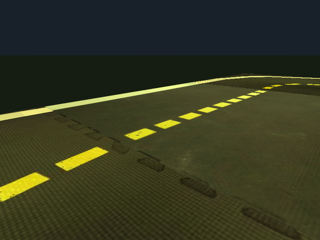

In [19]:
#Simple track challenge
import gym
import gym_duckietown
from IPython.display import display, clear_output
from PIL import Image
import time

# Create the environment
env = gym.make('Duckietown-small_loop-v0')
env.env.user_tile_start = (0,0)
env.env.start_pose = ([0.2,0,0.2],0)
env.reset()


# Helper function to display an image in Jupyter notebook
def show_array(arr):
    img = Image.fromarray(arr, 'RGB')
    # Make the image smaller to increase the FPS of the notebook
    img = img.resize((320, 240))
    display(img)

# Run the simulation until we're done
def mainc():    
    done = False
    
    action =[0.5, 0.0]
    observation, reward, done, info = env.step(action)
    frame = env.render(mode='rgb_array')

    # Clear the previous output and display the new frame
    clear_output(wait=True)
    show_array(frame)
        
def maind():    
    done = False
    while not done:
        action =[0.7, -1.75]
        observation, reward, done, info = env.step(action)
        frame = env.render(mode='rgb_array')
    
        # Clear the previous output and display the new frame
        clear_output(wait=True)
        show_array(frame)
        

start_time = time.time()
while time.time() - start_time < 1.7:
    mainc()
maind()


env.close()